In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
try:
  import pygal
except:
  !pip install pygal
  import pygal
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 1.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [3]:
cwd = os.getcwd()
path = os.path.join(cwd, 'MyDrive/MyDrive/PEC3, Visualizacion de datos/La_Liga_Winners.csv')
print("Ruta: ", path)
df = pd.read_csv(path)
df.info()

Ruta:  /content/MyDrive/MyDrive/PEC3, Visualizacion de datos/La_Liga_Winners.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Season                95 non-null     object
 1   Winner                95 non-null     object
 2   Winner's Points       95 non-null     object
 3   Runner-up             95 non-null     object
 4   Runner-up's Points    95 non-null     object
 5   Third Place           95 non-null     object
 6   Third Place's Points  95 non-null     object
 7   Top Scorer            95 non-null     object
 8   Top scorer's club(s)  95 non-null     object
 9   Goals                 95 non-null     object
dtypes: object(10)
memory usage: 7.5+ KB


In [4]:
df.head()

,Season,Winner,Winner's Points,Runner-up,Runner-up's Points,Third Place,Third Place's Points,Top Scorer,Top scorer's club(s),Goals
0,1929,Barcelona,25,Real Madrid,23,Athletic Bilbao,20,Paco Bienzobas,Real Sociedad,14
1,1929–30,Athletic Bilbao,30,Barcelona,23,Arenas,20,Guillermo Gorostiza,Athletic Bilbao,19
2,1930–31,Athletic Bilbao,22,Racing Santander,22,Real Sociedad,22,Bata,Athletic Bilbao,27
3,1931–32,Madrid FC[a],28,Athletic Bilbao,25,Barcelona,24,Guillermo Gorostiza,Athletic Bilbao,12
4,1932–33,Madrid FC[a],28,Athletic Bilbao,26,Espanyol,22,Manuel Olivares,Madrid FC,16


In [5]:
df.drop(df.loc[df.Winner == '87'].index, inplace=True)

In [6]:
#df.drop(df.loc[df['Winner\'s Points']=='87[10]'].index, inplace=True)
#df.drop(np.where(df['Winner\'s Points'] == '87\[10\]', True, False))
df.loc[df['Winner\'s Points']=='87[10]', ['Winner\'s Points']] = '87'

In [7]:
df.Winner = df.Winner.str.rstrip(to_strip=' ')

clubs = df.Winner.unique()
clubs = clubs[np.where(clubs=='League suspended due to Spanish Civil War', False, True)]
print(clubs)
df_winners = df.Winner\
               .value_counts()\
               .drop('League suspended due to Spanish Civil War')\
               .sort_values(ascending=False)

clubs = df_winners.index.copy()

print(df_winners)

print(df.groupby('Winner').get_group('Atlético Madrid'))

#df.loc[df['Winner\'s Points'] == 'League suspended due to Spanish Civil War'] = 0
#df['Winner\'s Points'] = df['Winner\'s Points'].astype(np.int16)

#df_grouped_winners = df\
#                    .drop('League suspended due to Spanish Civil War')\
#                    .astype(np.int16)\
#                    .groupby('Winner')\
#                    .sum()['Winner\'s Points']\
#                    .sort_values(ascending=False)
#print(df_grouped_winners)

['Barcelona' 'Athletic Bilbao' 'Madrid FC[a]' 'Real Betis'
 'Atlético Aviación[b]' 'Valencia' 'Sevilla' 'Atlético Madrid'
 'Real Madrid' 'Real Sociedad' 'Deportivo La Coruña']
Winner
Real Madrid             33
Barcelona               27
Atlético Madrid          9
Athletic Bilbao          8
Valencia                 6
Madrid FC[a]             2
Atlético Aviación[b]     2
Real Sociedad            2
Real Betis               1
Sevilla                  1
Deportivo La Coruña      1
Name: count, dtype: int64
     Season           Winner Winner's Points             Runner-up  \
21  1949–50  Atlético Madrid              33  Deportivo La Coruña    
22  1950–51  Atlético Madrid              40              Sevilla    
37  1965–66  Atlético Madrid              44          Real Madrid    
41  1969–70  Atlético Madrid              42      Athletic Bilbao    
44  1972–73  Atlético Madrid              48            Barcelona    
48  1976–77  Atlético Madrid              46            Barcelona    
67  

In [8]:
print(df_grouped_winners['Atlético Madrid'])

NameError: name 'df_grouped_winners' is not defined

In [9]:
print(os.path.join(os.path.split(path)[:-1][0], "winners.svg"))
print(df_winners.index)
values = []
for winner, points in df_winners.items():
  values.append({"value": points, "label": winner})

/content/MyDrive/MyDrive/PEC3, Visualizacion de datos/winners.svg
Index(['Real Madrid', 'Barcelona', 'Atlético Madrid', 'Athletic Bilbao',
       'Valencia', 'Madrid FC[a]', 'Atlético Aviación[b]', 'Real Sociedad',
       'Real Betis', 'Sevilla', 'Deportivo La Coruña'],
      dtype='object', name='Winner')


In [10]:
config = pygal.Config()
config.legend_at_bottom = True
config.x_labels = list(df_winners.index)
config.x_label_rotation = 45
config.rounded_bars = True

bar_chart = pygal.Bar(config=config, print_values=True)
bar_chart.title = 'LaLiga Ganadores'
bar_chart.add('Total de ligas ganadas', values)
#for index, value in df_winners.items():
#  bar_chart.add(index, values=value)
#bar_chart.render
bar_chart.render_to_file(os.path.join(os.path.split(path)[:-1][0], "winners.svg"))
#bar_chart.render_to_file(r"/content/MyDrive/MyDrive/PEC3, Visualizacion de datos/winners.svg")

In [11]:
from matplotlib.animation import FuncAnimation

from matplotlib import rc
rc('animation', html='jshtml')

In [12]:
annos = np.array(list(map(lambda x: int(x), df.Season.str[:4])))
annos[1:] += 1
annos

array([1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [13]:
df_animation = pd.DataFrame(index=clubs,
                             columns=annos,
                             data=np.zeros((clubs.size, annos.size)),
                             dtype=np.int16)
df_animation

,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Winner,,,,,,,,,,,,,,,,,,,,,
Real Madrid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Barcelona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atlético Madrid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Athletic Bilbao,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Valencia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Madrid FC[a],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atlético Aviación[b],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Real Sociedad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Real Betis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_ganadores = df[['Winner', 'Season']]
df_ganadores.loc[:,'Season'] = annos
df_ganadores.loc[
    df_ganadores.Winner == 'League suspended due to Spanish Civil War', 'Winner'
] = np.nan


#df_ganadores.iloc[:15,:]

for index, row in df_ganadores.iterrows():
  if not pd.isnull(row['Winner']):
    #print(row)
    df_animation.loc[row['Winner'], row['Season']:] += 1
df_animation

,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Winner,,,,,,,,,,,,,,,,,,,,,
Real Madrid,0,0,0,0,0,0,0,0,0,0,...,30,30,30,31,31,31,32,32,33,33
Barcelona,1,1,1,1,1,1,1,1,1,1,...,22,23,24,24,25,26,26,26,26,27
Atlético Madrid,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,9,9,9
Athletic Bilbao,0,1,2,2,2,3,3,4,4,4,...,8,8,8,8,8,8,8,8,8,8
Valencia,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Madrid FC[a],0,0,0,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Atlético Aviación[b],0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Real Sociedad,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Real Betis,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<ipython-input-16-ebf6787f500c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_animation.index, rotation=30, ha='right')
<ipython-input-16-ebf6787f500c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_animation.index, rotation=30, ha='right')


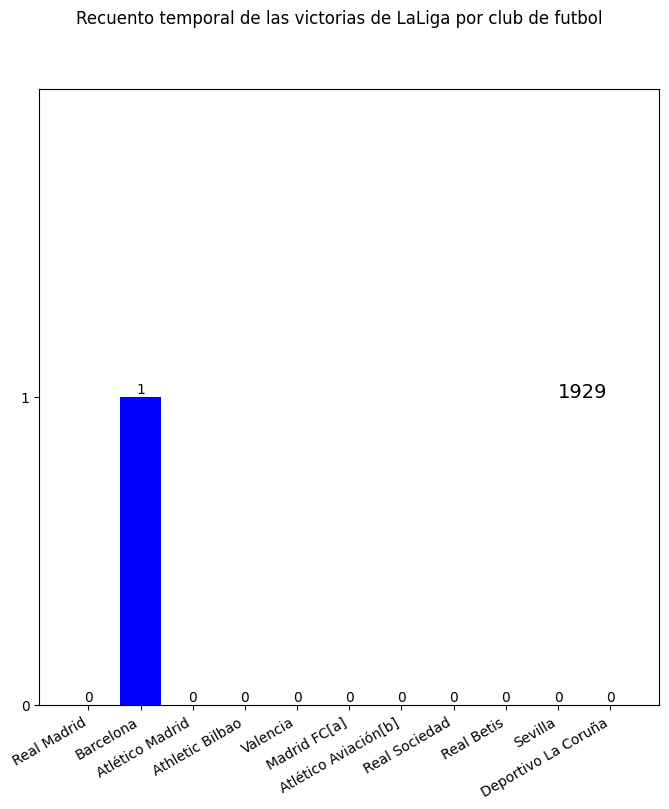

In [16]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.gca()
barcontainer = ax.bar(df_animation.index, df_animation.iloc[:,0], color='blue')
ax.set_xticklabels(df_animation.index, rotation=30, ha='right')
ax.bar_label(barcontainer, df_animation.iloc[:,0])
ax.text(x=9, y=(np.max(df_animation.iloc[:,0])+1)/2, s=annos[0], fontsize=14)
ax.set_yticks(np.arange(0, (np.max(df_animation.iloc[:,0])+1)))
fig.suptitle("Recuento temporal de las victorias de LaLiga por club de futbol")

def animate(frame):
    ax.cla()
    ax.set_ylim(bottom=0, top=np.max(df_animation.iloc[:,frame])+1)
    ax.text(x=9, y=(np.max(df_animation.iloc[:,frame])+1)/2, s=annos[frame], fontsize=14)
    barcontainer = ax.bar(df_animation.index, df_animation.iloc[:,frame], color='blue')
    ax.bar_label(barcontainer, df_animation.iloc[:,frame], padding=1)
    ax.set_yticks(np.arange(0, (np.max(df_animation.iloc[:,frame])+1)))
    ax.set_xticklabels(df_animation.index, rotation=30, ha='right')
    #for i, b in enumerate(barcontainer):
    #  b.set_height(df_animation.iloc[i,frame])
    #ax.bar_label(barcontainer, df_animation.iloc[:,frame])
    return barcontainer,

ani = FuncAnimation(fig=fig, func=animate, frames=annos.size, interval=500)
#ani

import matplotlib.animation as animation

Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist = 'me'), bitrate=1800)

ani.save(os.path.join(os.path.split(path)[:-1][0], "winners.mp4"), writer=writer)